# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

---

# **Introduction**

This report analyzes customer-level sales data from the first six weeks following the launch of the new office product line by Pens and Printers. The aim is to uncover insights that can guide the sales team in choosing the most effective and efficient sales approach going forward.

By comparing the results of three different outreach strategies, Email, Phone Call, and a combination of both, this analysis show how customers responded in terms of purchase behavior, revenue, and engagement patterns over time.

Ultimately, the goal is to support better-informed decisions that maximize revenue while optimizing the time and effort invested by the sales team.


In [17]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing Data
data= pd.read_csv("product_sales.csv")

# **I-Data Validation and Cleaning**

### **Dataset overview**
The dataset contains 15,000 rows and 8 columns, capturing customer-level sales information during the first six weeks of the marketing campaign.

- `week`: contains integers ranging from 1 to 6, corresponding to each week of the campaign. There are no missing values, and the data is clean and usable as-is.

- `sales_method`: contains 5 unique categorical values: `'email'`, `'call'`, `'email + call'`, `'em + call'`, and `'Email'`. Only 3 distinct methods should exist according to company records, indicating a labeling inconsistency that needs to be corrected.

- `customer_id`: holds unique identifiers for each customer (15,000 unique values). There are no duplicates or missing values, and no cleaning was required.

- `nb_sold`: indicates the number of products sold per customer. Values range from 7 to 16, with no missing or invalid entries. No cleaning was necessary.

- `revenue`: is the column that represents the revenue generated per customer. There are 1,074 missing values in this column, which will be addressed in the following steps.

- `years_as_customer`: tracks how long each customer has been with the company. While there are no missing values, the maximum value is 63, which is not possible given that the company was founded in 1984. This indicates the presence of outliers that need to be assessed.

- `nb_site_visits`: Contains the number of times a customer visited the website in the past 6 months. Values range from 12 to 41. All values are valid, and no cleaning was required.

- `state`: Represents the U.S. state of the customer. This column has 50 unique values and no missing data. The data appears valid and was used as-is.


In [3]:
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
data.describe(include="all")

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,5,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,2e72d641-95ac-497b-bbf8-4861764a7097,NaN,NaN,NaN,NaN,California
freq,NaN,7456,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


In [6]:
data.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

### **I-1 Cleaning `sales_method` Column**

Upon inspection of the values the column, simple inconsistencies such as differences in capitalization and the use of abbreviations resulted in two additional categories. These issues were corrected, and after cleaning, the column now contains only the three expected values corresponding to each sales method: `Email`, `Call`, and `Email + Call`.


In [7]:
data["sales_method"].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [8]:
data['sales_method'] = data['sales_method'].str.strip().str.lower()

corrections = {
    'email': 'Email',
    'call': 'Call',
    'email + call': 'Email and Call',
    'em + call': 'Email and Call'
}

data['sales_method'] = data['sales_method'].replace(corrections)
data["sales_method"].value_counts()

sales_method
Email             7466
Call              4962
Email and Call    2572
Name: count, dtype: int64

### **I-2 Cleaning `years_as_customer` Column**

Some values in this column exceeded 41 years of customer tenure, which is not possible since the company was founded in 1984. The two affected rows appeared to result from simple data entry errors. Rather than removing them, the values were corrected by capping them at 41.


In [9]:
data_year_as_customer = data["years_as_customer"].value_counts().to_frame()
data_year_as_customer.insert(0, "years_as_customer", data_year_as_customer.index.astype(int))
data_year_as_customer.reset_index(drop=True, inplace=True)
data_year_as_customer = data_year_as_customer.sort_values(by="years_as_customer")
data_year_as_customer["enrollement_year"] = 2025- data_year_as_customer["years_as_customer"]
data_year_as_customer

,years_as_customer,count,enrollement_year
3,0,1471,2025
0,1,2504,2024
1,2,1987,2023
2,3,1619,2022
4,4,1338,2021
5,5,1118,2020
6,6,918,2019
7,7,709,2018
8,8,608,2017
9,9,509,2016


In [10]:
2025-1984

41

In [11]:
data[data['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [12]:
data['years_as_customer'] = data['years_as_customer'].clip(upper=41)

### **I-3 Missing values in the `revenue` column**

- **(Plot 1)** : After taking a look at the overall distribution of missing values throughout the dataset, we can see that they are not distributed following any specific pattern within the data.  

- **(Plot 2)** : When taking a closer look at the distribution by `week`, `sales_method`, `nb_sold`, `years_as_customer`, `nb_site_visits`, and `state`, we can also see that there is no particular pattern across these variables.  

Therefore, it appears to be a case of **Missing at Random (MAR)** values. Since they represent only about 7.16% of the total rows, removing them will not significantly affect the dataset size and will help maintain data quality.


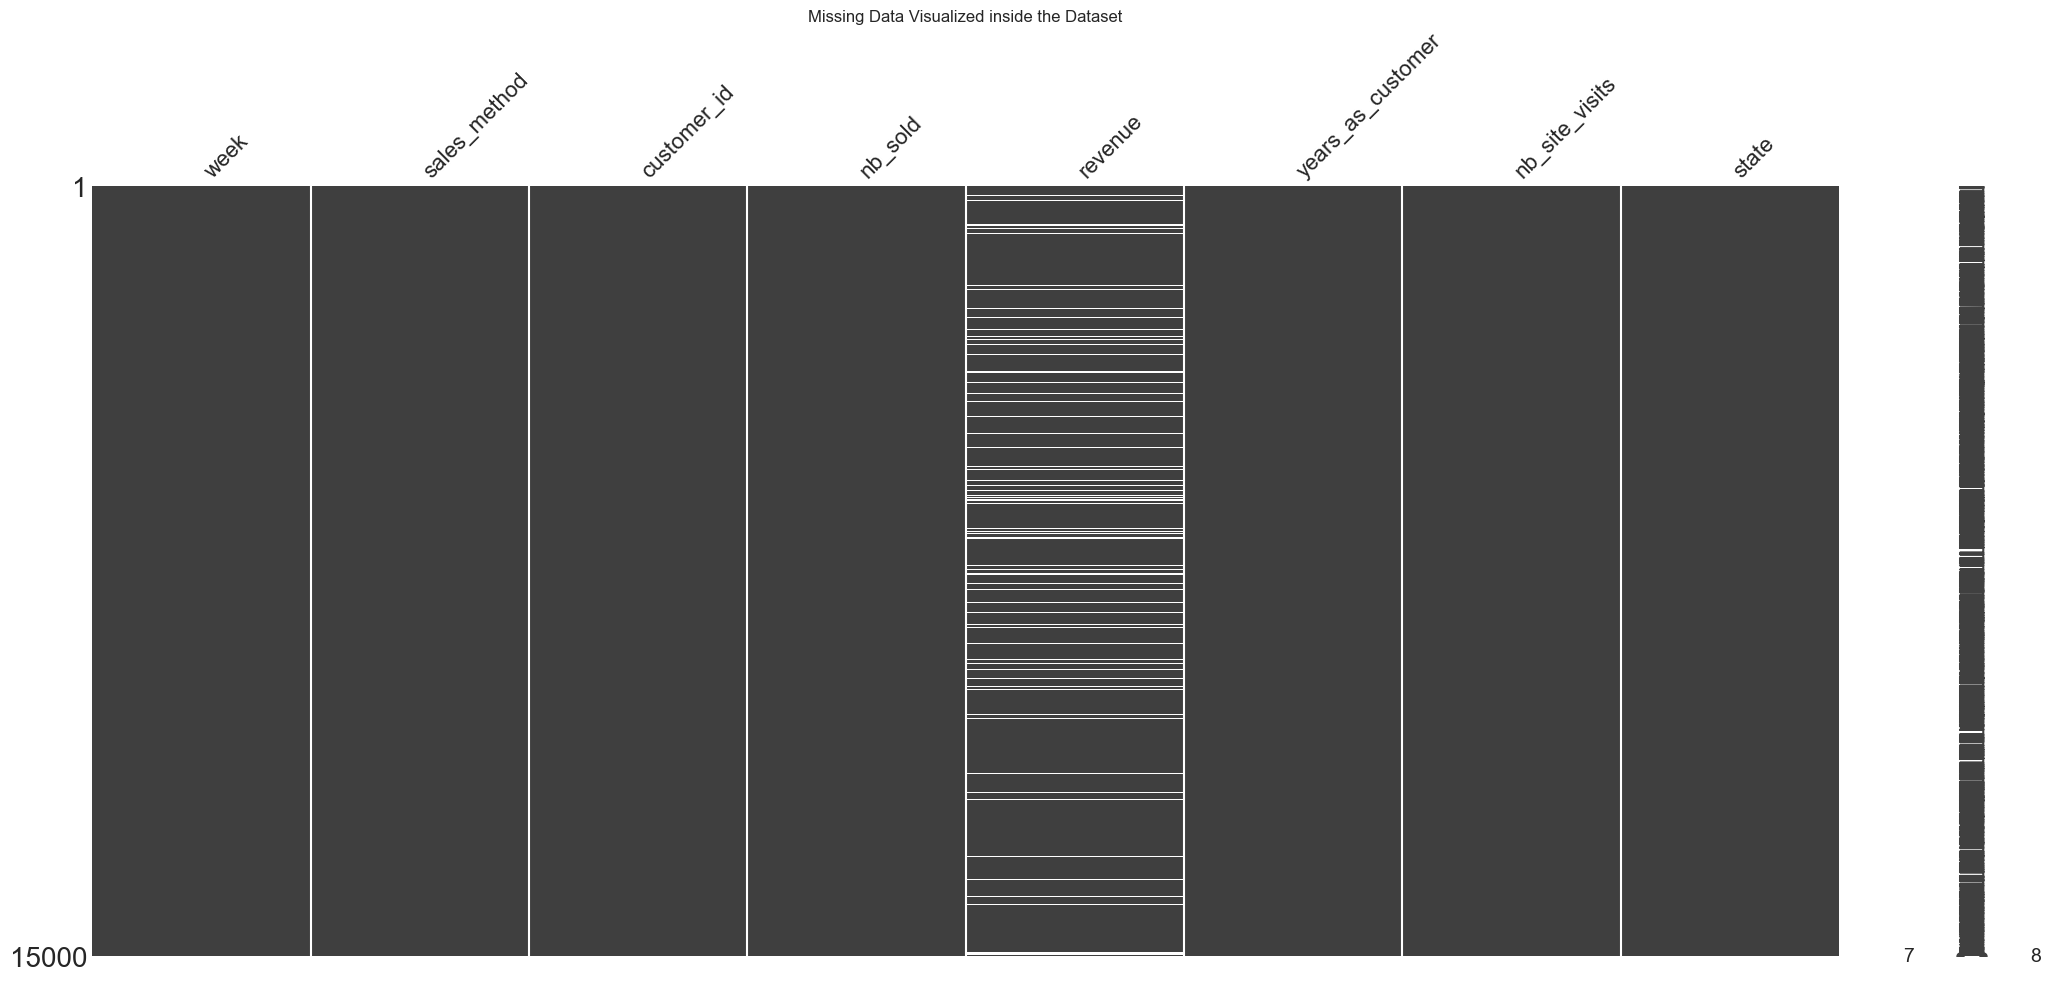

In [13]:
# === Plot 1 :
msno.matrix(data)
plt.title("Missing Data Visualized inside the Dataset")
plt.show()


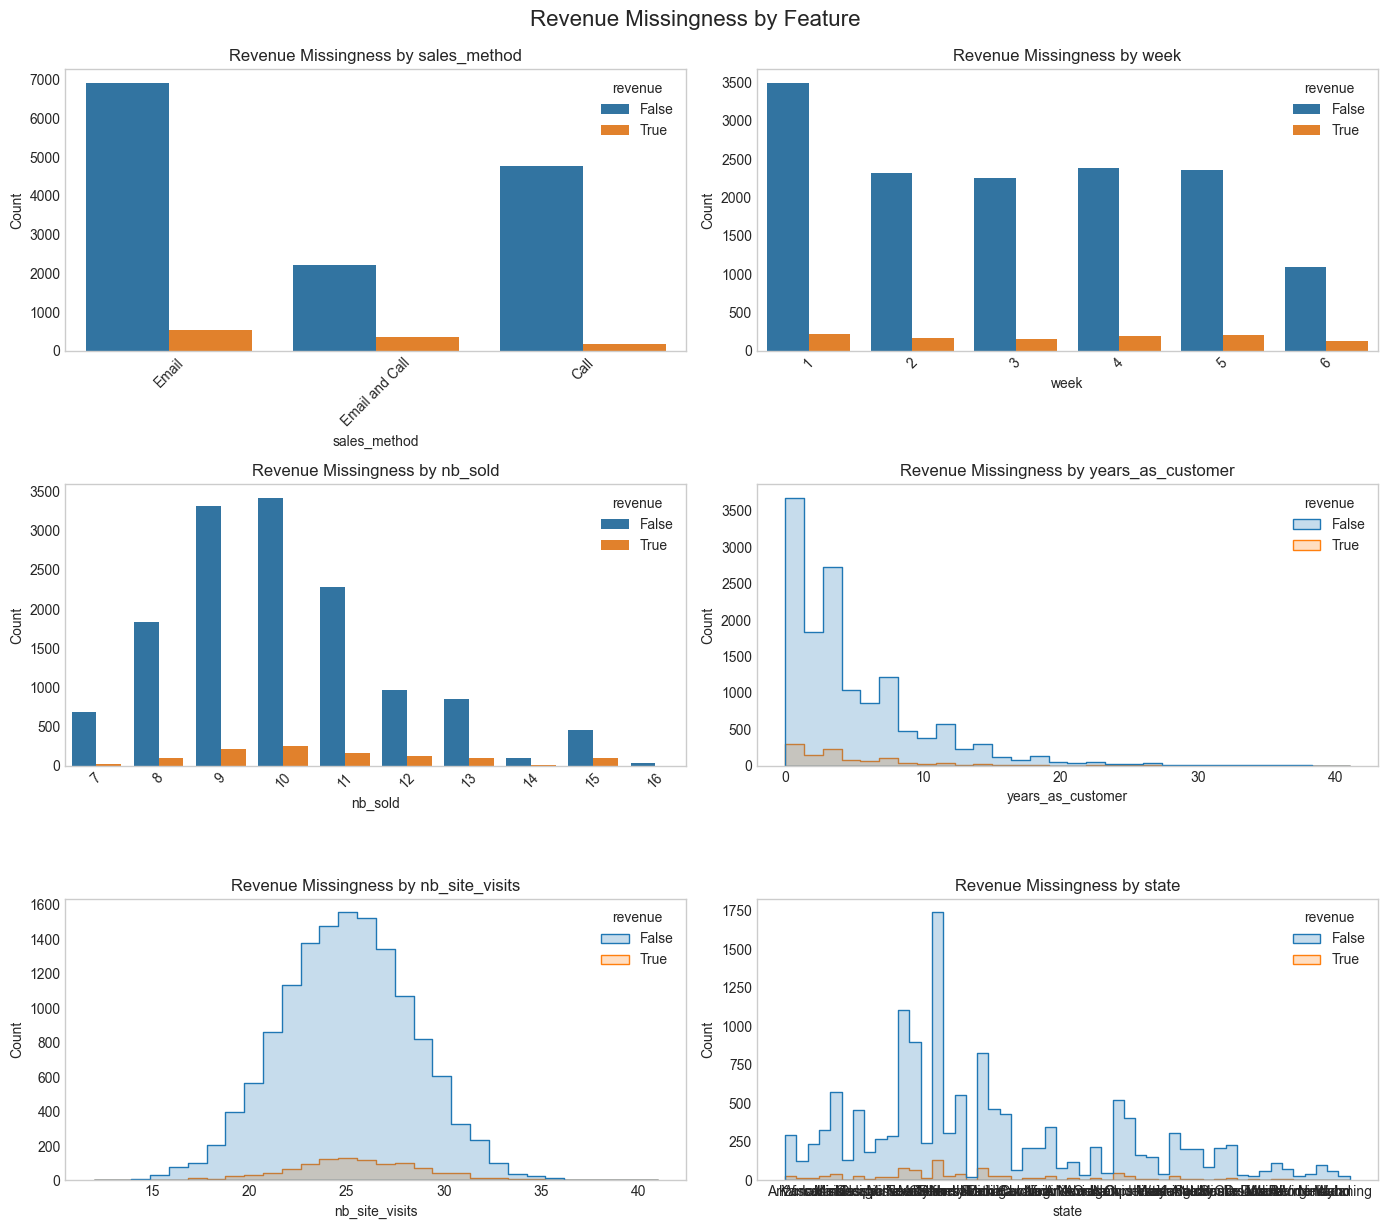

In [14]:
# === Plot 2: Revenue Missingness by Feature ===

# Columns to examinate
cols = ['sales_method', 'week', 'nb_sold', 'years_as_customer', 'nb_site_visits', 'state']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    if data[col].nunique() < 20:
        sns.countplot(data=data, x=col, hue=data['revenue'].isna(), ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(False)
    else:
        sns.histplot(
            data=data,
            x=col,
            hue=data['revenue'].isna(),
            bins=30,
            element="step",
            stat="count",
            ax=axes[i]
        )

    axes[i].set_title(f"Revenue Missingness by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].grid(False)

plt.tight_layout()
plt.suptitle("Revenue Missingness by Feature", fontsize=16, y=1.02)
plt.show()


In [15]:
data.dropna(subset=['revenue'], inplace=True)

In [16]:
# Last check-in
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


# **II-Exploratory Data Analysis**

Let's define a fixed color palette for each sales method. This will help us maintain consistent and intuitive visuals throughout the analysis.

In [18]:
# Fixed color palette
color_palette = {
    'Email': "#59A14F",          # Green
    'Call': "#4E79A7",           # Blue
    'Email and Call': "#F28E2B"  # Orange
}

palette = color_palette
hue_order = ['Email', 'Call', 'Email and Call']

### **II-1 Univariate Insights**
- `sales_method`

Most customers were acquired through the `Email` method, followed by `Call`, while the combined approach `Email and Call` brought in the fewest.  This gives us a first idea of how each method performed in terms of reach. We’ll look next at how they compare in terms of revenue.

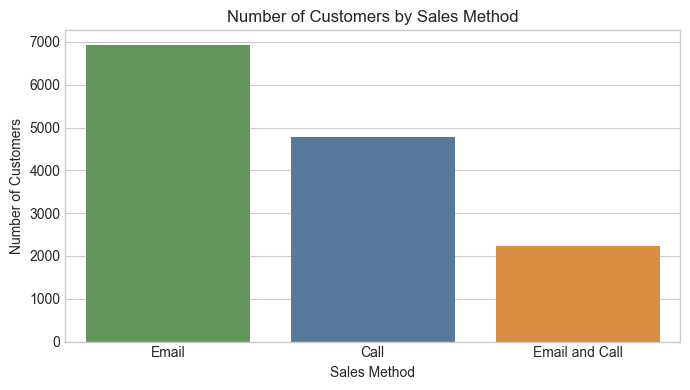

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(data=data, x='sales_method', order=hue_order, palette=palette)
plt.title("Number of Customers by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


Customers acquired through `Email and Call` bring in the highest revenue on average, well above the other two methods. The `Email` approach, although it reaches the largest number of customers, drives a lower individual revenue level. The `Call` method shows the weakest performance, both in reach and in value.

This contrast suggests that while email campaigns are effective for broad acquisition, the combined approach clearly delivers better financial results per customer

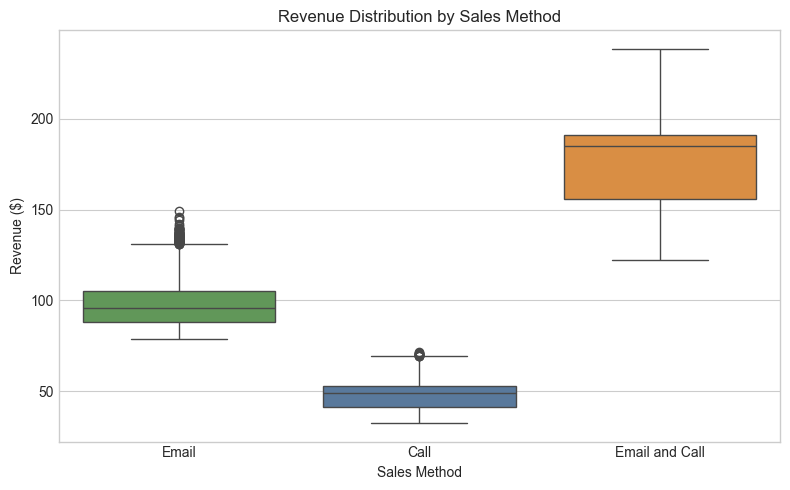

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='sales_method', y='revenue', order=hue_order, palette=palette)
plt.title("Revenue Distribution by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()


- `revenue`

The revenue distribution is uneven, with several peaks. Most customers generate between €40 and €110, but a few groups reach much higher values, especially around €200. The boxplot also confirms this pattern : while the majority of customers fall within a standard range, a small number of high-revenue customers stand out as outliers. These clients are rare but account for a disproportionate share of the total revenue.


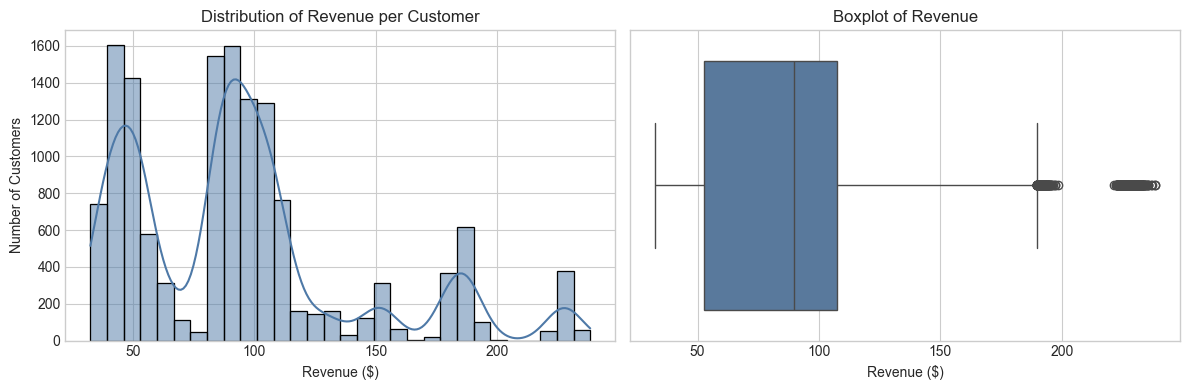

In [21]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='revenue', bins=30, kde=True, color="#4E79A7")
plt.title("Distribution of Revenue per Customer")
plt.xlabel("Revenue ($)")
plt.ylabel("Number of Customers")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='revenue', color="#4E79A7")
plt.title("Boxplot of Revenue")
plt.xlabel("Revenue ($)")

plt.tight_layout()
plt.show()

- `nb_sold`

Most customers purchased between 9 and 12 products, with a concentration around 10. The distribution is slightly asymmetrical but remains tight overall. Even though a few customers bought more than 14 products, these are rare cases and they don’t really impact the overall trend. In general, the volume sold per customer is stable.


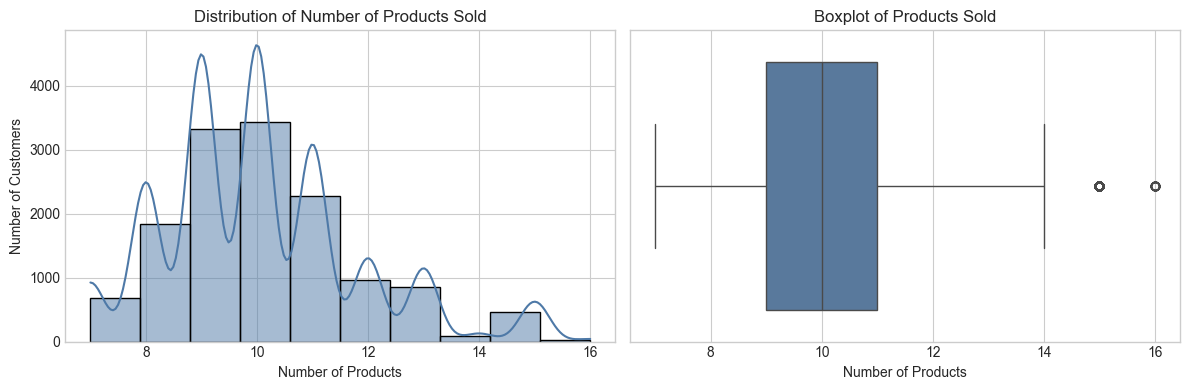

In [22]:
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='nb_sold', bins=10, kde=True, color="#4E79A7")
plt.title("Distribution of Number of Products Sold")
plt.xlabel("Number of Products")
plt.ylabel("Number of Customers")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='nb_sold', color="#4E79A7")
plt.title("Boxplot of Products Sold")
plt.xlabel("Number of Products")

plt.tight_layout()
plt.show()


- `years_as_customer`

The distribution shows that most customers are relatively new to the company, with the majority having joined within the past 10 years. The number of long-term customers decreases sharply as tenure increases and few customers stand out with more than 20 or even 30 years of loyalty.

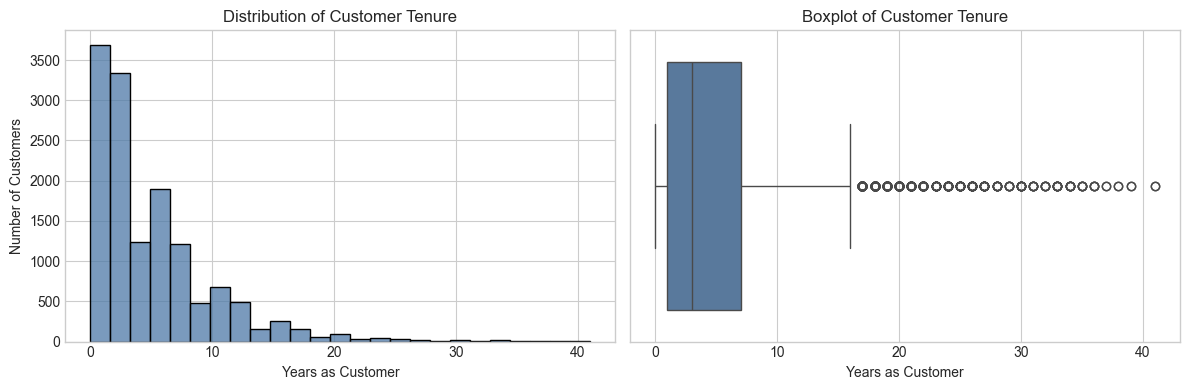

In [24]:
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='years_as_customer', bins=25, kde=False, color="#4E79A7")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Years as Customer")
plt.ylabel("Number of Customers")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='years_as_customer', color="#4E79A7")
plt.title("Boxplot of Customer Tenure")
plt.xlabel("Years as Customer")

plt.tight_layout()
plt.show()


- `nb_site_visits`

The number of website visits is centered around 25, with most customers visiting between 20 and 30 times over the last six months. The distribution is balanced, showing no major skew, which suggests a relatively homogeneous level of engagement among customers.  


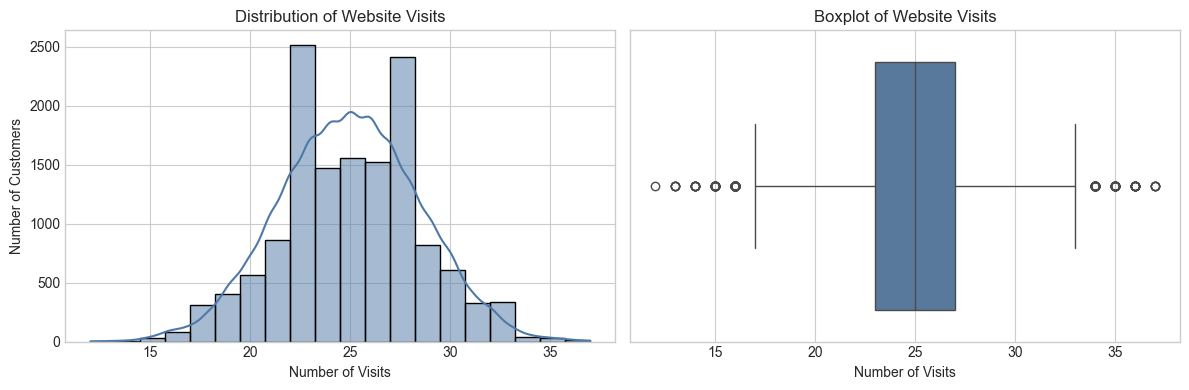

In [25]:
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='nb_site_visits', bins=20, kde=True, color="#4E79A7")
plt.title("Distribution of Website Visits")
plt.xlabel("Number of Visits")
plt.ylabel("Number of Customers")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='nb_site_visits', color="#4E79A7")
plt.title("Boxplot of Website Visits")
plt.xlabel("Number of Visits")

plt.tight_layout()
plt.show()


- Comparison of Customer Profiles (`nb_sold`, `nb_site_visits`, `years_as_customer`) by `sales_method`

Looking at the three variables together gives a clearer picture of how each sales method performs beyond revenue.

Customers reached through `Email and Call` tend to buy more products on average and also show higher website activity. This suggests stronger engagement when both channels are combined. In contrast, customers reached through `Email` or `Call` alone show similar online behavior but slightly lower sales volumes.

Regarding customer tenure, there is no major difference between methods — most customers, regardless of how they were reached, have been with the company for a relatively short time. This indicates that the differences in performance mainly come from how customers respond to the sales approach rather than how long they’ve been customers.


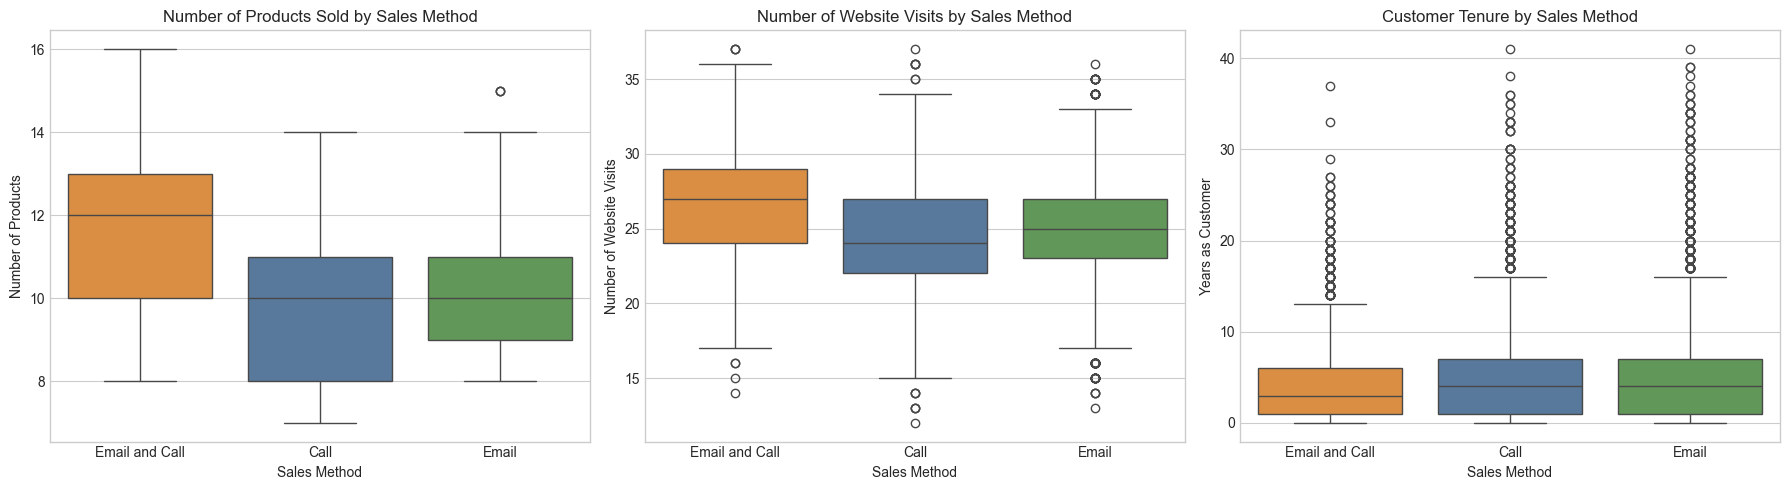

In [26]:
# Variables to visualize
quant_vars = ['nb_sold', 'nb_site_visits', 'years_as_customer']
titles = [
    "Number of Products Sold by Sales Method",
    "Number of Website Visits by Sales Method",
    "Customer Tenure by Sales Method"
]
ylabels = ["Number of Products", "Number of Website Visits", "Years as Customer"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, var in enumerate(quant_vars):
    sns.boxplot(
        data=data,
        x='sales_method',
        y=var,
        palette=palette,
        hue_order=hue_order,
        ax=axes[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Sales Method")
    axes[i].set_ylabel(ylabels[i])

plt.tight_layout()
plt.show()


### **II-2 Bivariate Insights**

Now that we have observe each variable individually, we can look at how they interact. This section focuses on key relationships between variables, particularly how the sales methods influence sales volume, revenue, and customer behavior.  

- Correlation Between Numerical Variables

The correlation matrix shows a relationship between `nb_sold` and `revenue` (0.69), which is expected since higher product sales directly drive revenue. There is also a moderate positive correlation between `nb_sold` and `nb_site_visits` (0.49), suggesting that customers who visit the website more often tend to buy more products.  

The `week` variable shows a meaningfull correlation with `nb_sold`, possibly reflecting the campaign timeline effect. In contrast, `years_as_customer` is almost uncorrelated with other variables, indicating that customer seniority does not strongly influence engagement or purchase behavior in this dataset.


In [27]:
data.select_dtypes(include=['float64', 'int64']).corr().style.background_gradient(cmap='coolwarm')

,week,nb_sold,revenue,years_as_customer,nb_site_visits
week,1.000000,0.806590,0.356179,-0.082492,0.416492
nb_sold,0.806590,1.000000,0.696165,-0.098678,0.487669
revenue,0.356179,0.696165,1.000000,-0.064872,0.323089
years_as_customer,-0.082492,-0.098678,-0.064872,1.000000,-0.049153
nb_site_visits,0.416492,0.487669,0.323089,-0.049153,1.000000


- Time (`week`) analysis

The first week of the campaign brought in the largest number of customers, followed by a stable phase from Week 2 to Week 5, before a clear drop in Week 6.  

However, when looking at total revenue, the pattern doesn’t follow the same trend. Despite lower acquisition after Week 1, revenue remains relatively high in Weeks 4 and 5, suggesting that fewer customers generated more value during that period.  

This shift between customer volume and revenue performance raises an interesting question: what changed during those weeks that made the results more profitable despite fewer acquisitions?  
We’ll look at this more closely in the next section to understand which factors, particularly the sales methods, drove this difference.



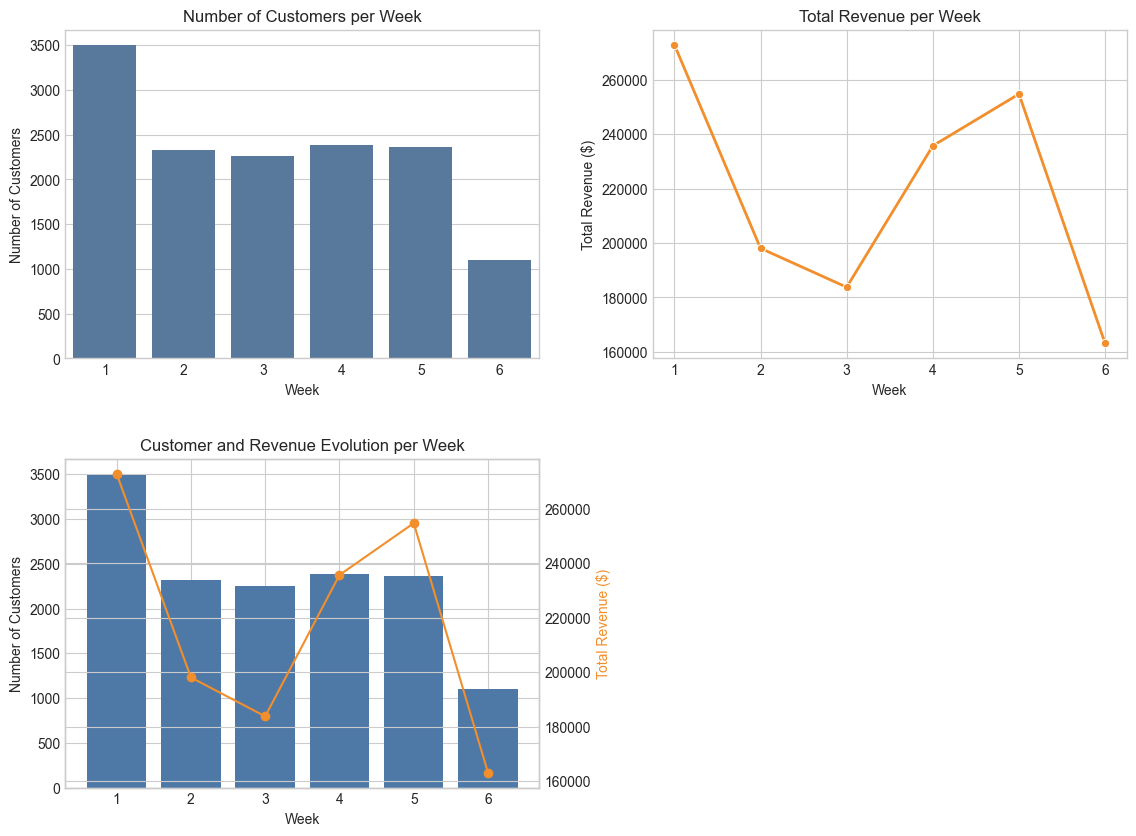

In [28]:
weekly_revenue = data.groupby('week')['revenue'].sum().reset_index()
weekly_counts = data['week'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# 1. Number of customers per week
sns.countplot(data=data, x='week', color="#4E79A7", ax=axes[0, 0])
axes[0, 0].set_title("Number of Customers per Week")
axes[0, 0].set_xlabel("Week")
axes[0, 0].set_ylabel("Number of Customers")

# 2. Total revenue per week
sns.lineplot(data=weekly_revenue, x='week', y='revenue', marker='o', linewidth=2, color="#F28E2B", ax=axes[0, 1])
axes[0, 1].set_title("Total Revenue per Week")
axes[0, 1].set_xlabel("Week")
axes[0, 1].set_ylabel("Total Revenue ($)")

# 3. Combined view (bottom left)
ax3 = axes[1, 0]
ax3.bar(weekly_counts.index, weekly_counts.values, color="#4E79A7")
ax3.set_ylabel("Number of Customers")
ax3.set_xlabel("Week")
ax3.set_title("Customer and Revenue Evolution per Week")

ax4 = ax3.twinx()
ax4.plot(weekly_revenue['week'], weekly_revenue['revenue'], color="#F28E2B", marker='o')
ax4.set_ylabel("Total Revenue ($)", color="#F28E2B")

fig.delaxes(axes[1, 1])

plt.tight_layout(pad=3)
plt.show()


- Weekly revenue trends by `sales_method`

Through these charts, we can observe a clear shift in performance over the campaign.  
At the beginning, the `Email` method largely dominated in total revenue, benefiting from the highest customer reach during the first weeks. However, its impact steadily declined over time.  

In contrast, the combined `Email and Call` approach started more modestly but showed a continuous and strong progression, eventually overtaking all other methods from Week 4 onward. This evolution confirms that even though it reached fewer customers, this method generated the most value per client as the campaign matured.  

The `Call` method remained consistently behind in both volume and revenue contribution, suggesting that phone campaigns alone were less efficient in this context.


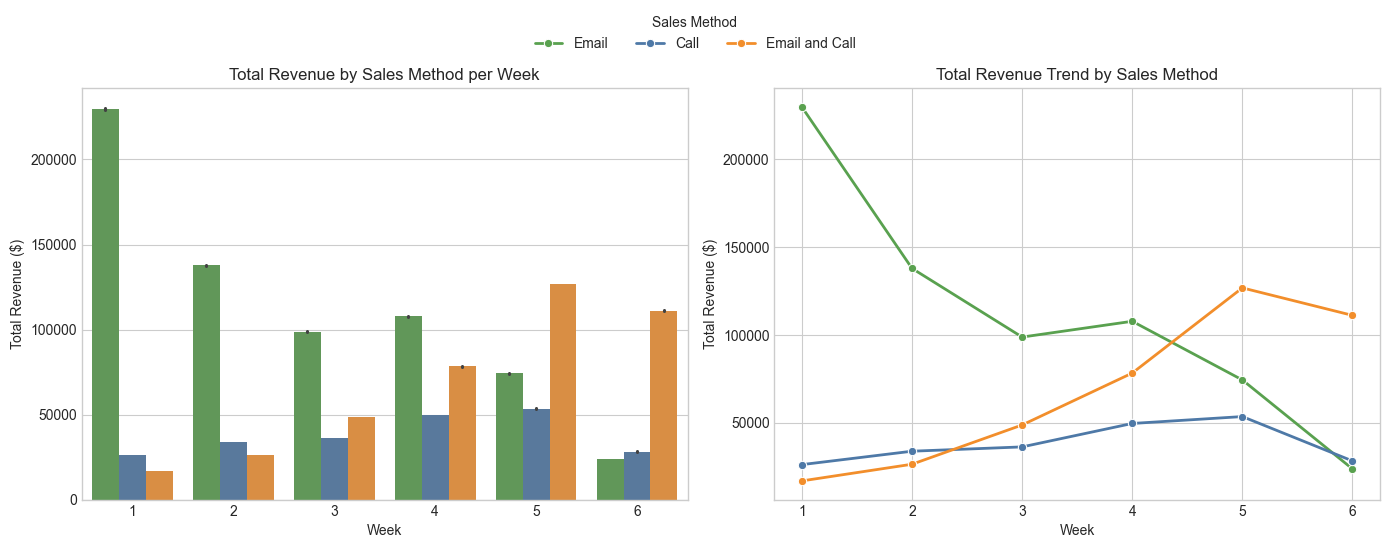

In [29]:
# Pre-aggregated weekly data
sum_weekly = data.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
avg_weekly = data.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.3)

# Barplot - Total revenue per week
sns.barplot(
    data=data,
    x='week',
    y='revenue',
    hue='sales_method',
    estimator=sum,
    ax=axes[0],
    hue_order=hue_order,
    palette=palette
)
axes[0].set_title("Total Revenue by Sales Method per Week")
axes[0].set_ylabel("Total Revenue ($)")
axes[0].set_xlabel("Week")
axes[0].legend_.remove()

# Lineplot - Total revenue trend
sns.lineplot(
    data=sum_weekly,
    x='week',
    y='revenue',
    hue='sales_method',
    marker='o',
    linewidth=2,
    ax=axes[1],
    palette=palette,
    hue_order=hue_order
)
axes[1].set_title("Total Revenue Trend by Sales Method")
axes[1].set_ylabel("Total Revenue ($)")
axes[1].set_xlabel("Week")
axes[1].legend_.remove()

# Common legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Sales Method", loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)

plt.tight_layout()
plt.show()


- Average `revenue` by `sales_method`

While the total revenue showed how each method contributed globally, looking at the average revenue per customer gives a more precise view of their efficiency.

The `Email and Call` method stands out clearly, with a steady and strong increase week after week. Each customer reached through this combined approach generated more revenue on average, confirming its higher value impact.  

The `Email` method remains stable overall, showing consistent but moderate performance, while `Call` alone continues to lag behind with the lowest averages throughout the campaign.  

This confirms the trend observed earlier: the combined strategy didn’t just generate more revenue in total, it also delivered better returns per customer. It suggests that the campaign’s later success came not from volume, but from improving the quality of customer interactions.


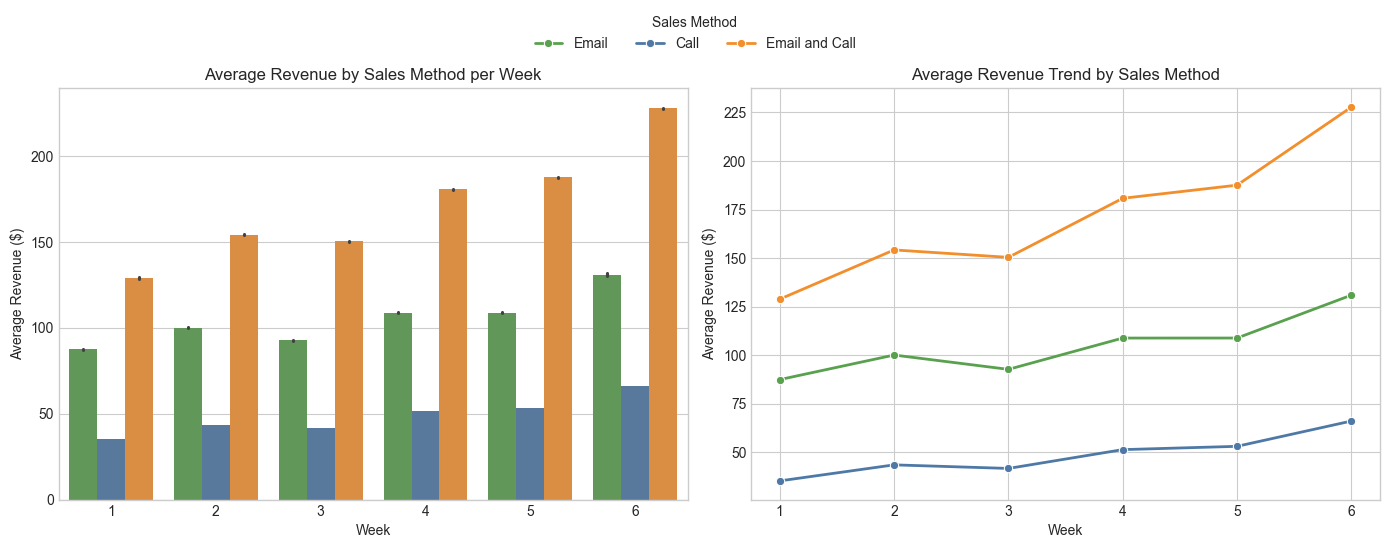

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.3)

# Barplot - Average revenue per week
sns.barplot(
    data=data,
    x='week',
    y='revenue',
    hue='sales_method',
    estimator='mean',
    ax=axes[0],
    hue_order=hue_order,
    palette=palette
)
axes[0].set_title("Average Revenue by Sales Method per Week")
axes[0].set_ylabel("Average Revenue ($)")
axes[0].set_xlabel("Week")
axes[0].legend_.remove()

# Lineplot - Average revenue trend
sns.lineplot(
    data=avg_weekly,
    x='week',
    y='revenue',
    hue='sales_method',
    marker='o',
    linewidth=2,
    ax=axes[1],
    palette=palette,
    hue_order=hue_order
)
axes[1].set_title("Average Revenue Trend by Sales Method")
axes[1].set_ylabel("Average Revenue ($)")
axes[1].set_xlabel("Week")
axes[1].legend_.remove()

# Common legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Sales Method", loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)

plt.tight_layout()
plt.show()


- `state` analysis

This chart compares the number of customers with the average revenue per client across states.  
We can see two very distinct profiles emerging. States such as **California**, **Texas**, **Florida**, and **New York** concentrate the largest number of clients, but their average revenue per customer remains moderate. These are high-volume markets where reach drives performance more than individual value.

On the other side, smaller states like **South Dakota**, **North Dakota**, **Delaware**, **Idaho**, and **Vermont** show the highest average revenue per client despite limited customer bases. These regions seem to deliver more efficient or higher-value sales interactions.

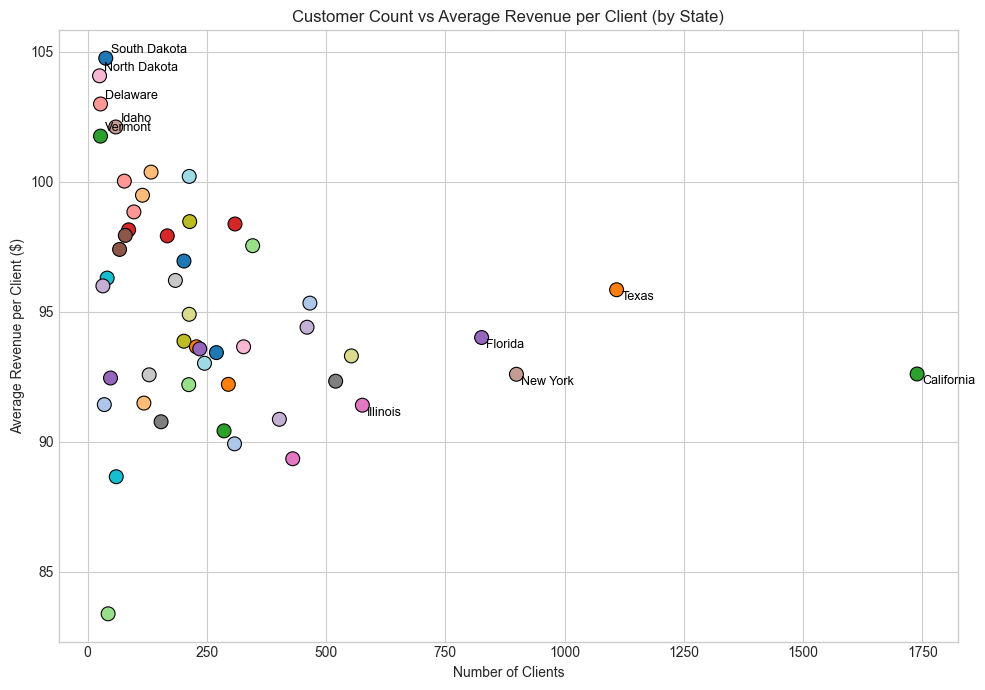

In [31]:
state_summary = (
    data.groupby('state')
    .agg(
        nb_clients=('customer_id', 'nunique'),
        total_revenue=('revenue', 'sum')
    )
    .assign(avg_revenue=lambda df: df['total_revenue'] / df['nb_clients'])
    .reset_index()
)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=state_summary,
    x='nb_clients',
    y='avg_revenue',
    hue='state',
    palette='tab20',
    s=100,
    edgecolor="black",
    legend=False
)

plt.title("Customer Count vs Average Revenue per Client (by State)")
plt.xlabel("Number of Clients")
plt.ylabel("Average Revenue per Client ($)")

# Top 5 states by average revenue
top_avg_revenue = state_summary.sort_values('avg_revenue', ascending=False).head(5)

# Top 5 states by number of clients
top_nb_clients = state_summary.sort_values('nb_clients', ascending=False).head(5)

# Annotate top 5 by average revenue
for _, row in top_avg_revenue.iterrows():
    plt.text(
        row['nb_clients'] + 10,
        row['avg_revenue'] + 0.2,
        row['state'],
        fontsize=9,
        color='black'
    )

# Annotate top 5 by number of clients
for _, row in top_nb_clients.iterrows():
    plt.text(
        row['nb_clients'] + 10,
        row['avg_revenue'] - 0.4,
        row['state'],
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

- Revenue breakdown by `state` and `sales_method`

These charts provide a complementary view of performance by combining the geographic and sales method perspectives.

On the left, the states with the highest total revenue — such as **California**, **Texas**, **New York**, **Florida**, and **Illinois** — are also those with the largest customer bases. Their performance relies mostly on volume, driven primarily by the `Email` method, which dominates these high-reach markets.  

On the right, the top states by **average revenue per client** tell a different story. Smaller markets like **South Dakota**, **North Dakota**, **Delaware**, **Idaho**, and **Vermont** generate much higher revenue per customer, with a clear contribution from the `Email and Call` method.  

Together, these results confirm the two distinct growth patterns:  
        - Large states maximize total revenue through wide customer acquisition.  
        - Specific smaller states deliver stronger value per customer thanks to more effective or personalized sales approaches.  

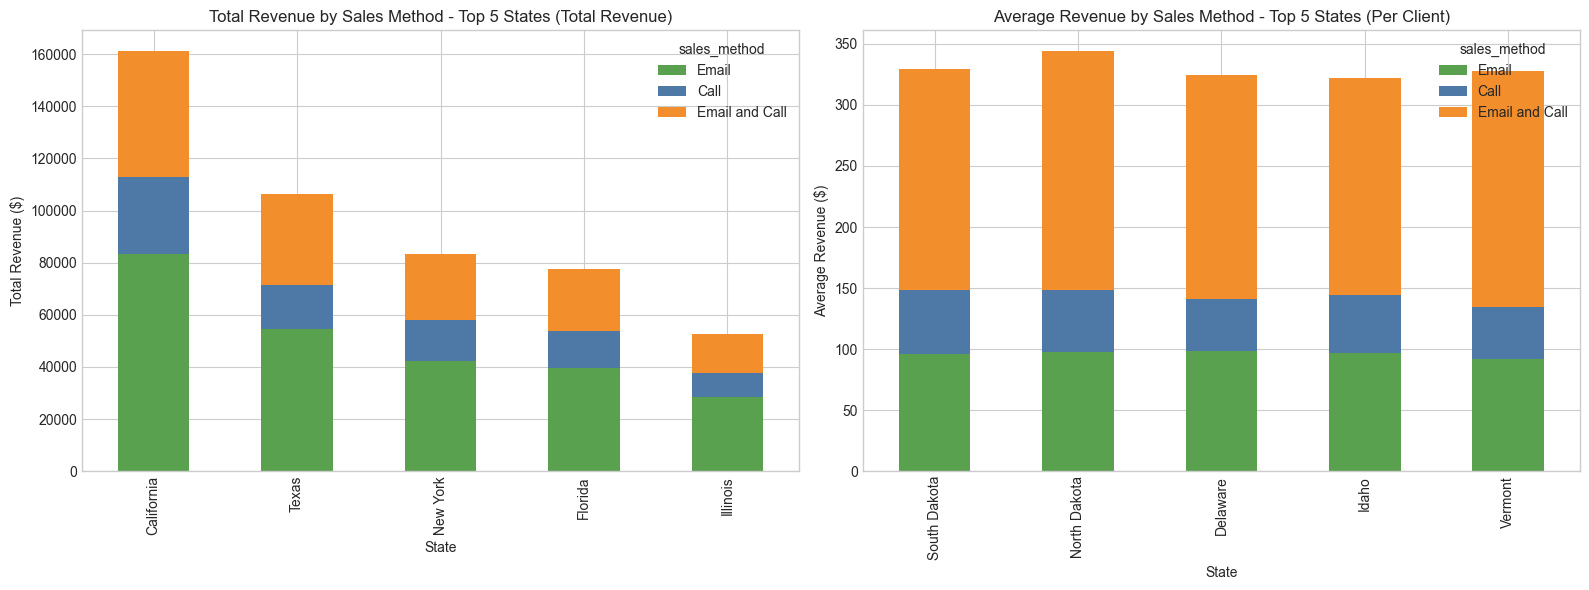

In [32]:
# Top 5 states by total revenue
top5_total_rev = state_summary.nlargest(5, 'total_revenue')['state'].tolist()

# Top 5 states by average revenue per client
top5_avg_rev = state_summary.nlargest(5, 'avg_revenue')['state'].tolist()

# Keep states appearing in either top 5 lists
top_states = top5_total_rev + top5_avg_rev
filtered_data = data[data['state'].isin(top_states)]

# 1Total revenue by sales method and state
total_revenue_state_method = (
    filtered_data.groupby(['state', 'sales_method'])['revenue']
    .sum()
    .reset_index()
)

# Pivot for stacked barplot
pivot_total = (
    total_revenue_state_method
    .pivot(index='state', columns='sales_method', values='revenue')
    .fillna(0)
)
pivot_total = pivot_total[hue_order]  # Ensure consistent order

# Average revenue per client by sales method and state
avg_revenue_state_method = (
    filtered_data.groupby(['state', 'sales_method'])['revenue']
    .mean()
    .reset_index()
)

pivot_avg = (
    avg_revenue_state_method
    .pivot(index='state', columns='sales_method', values='revenue')
    .fillna(0)
)
pivot_avg = pivot_avg[hue_order]

# Colors
colors = [palette[m] for m in hue_order]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Total revenue
pivot_total.loc[top5_total_rev].plot(kind='bar', stacked=True, ax=axes[0], color=colors)
axes[0].set_title("Total Revenue by Sales Method - Top 5 States (Total Revenue)")
axes[0].set_ylabel("Total Revenue ($)")
axes[0].set_xlabel("State")

# Average revenue
pivot_avg.loc[top5_avg_rev].plot(kind='bar', stacked=True, ax=axes[1], color=colors)
axes[1].set_title("Average Revenue by Sales Method - Top 5 States (Per Client)")
axes[1].set_ylabel("Average Revenue ($)")
axes[1].set_xlabel("State")

plt.tight_layout()
plt.show()

- `years_as_customer` and revenue

Here, we wanted to check whether customer tenure had any real impact on revenue levels.  
At first glance, newer customers seem to generate slightly higher average revenue, but this can be explained by the fact that they are far more numerous in the dataset, as shown earlier. There’s no real evidence that tenure itself drives significant differences.

When breaking it down by sales method, the same conclusion holds: regardless of how long customers have been with the company, the hierarchy between methods stays the same — `Email and Call` performs best, followed by `Email`, then `Call`.  
In short, tenure doesn’t seem to condition revenue. The differences observed remain linked to the sales approach rather than customer seniority.


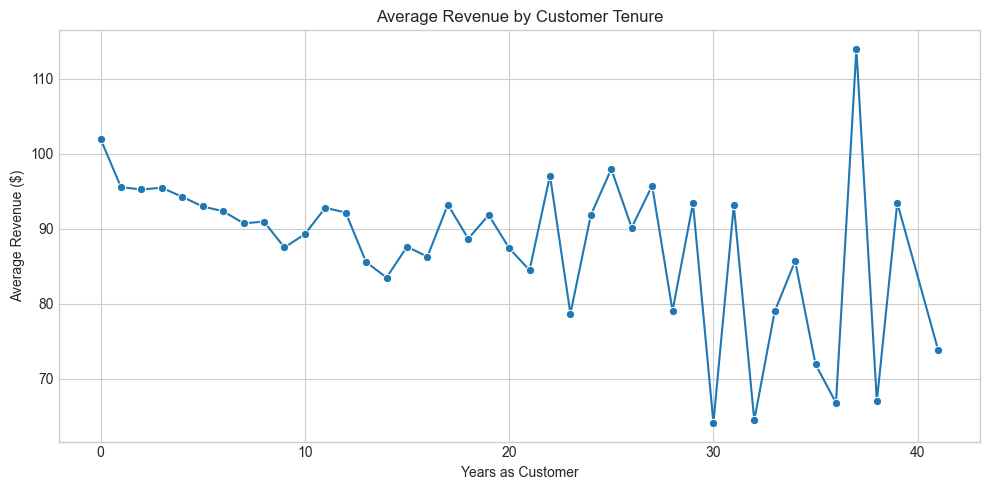

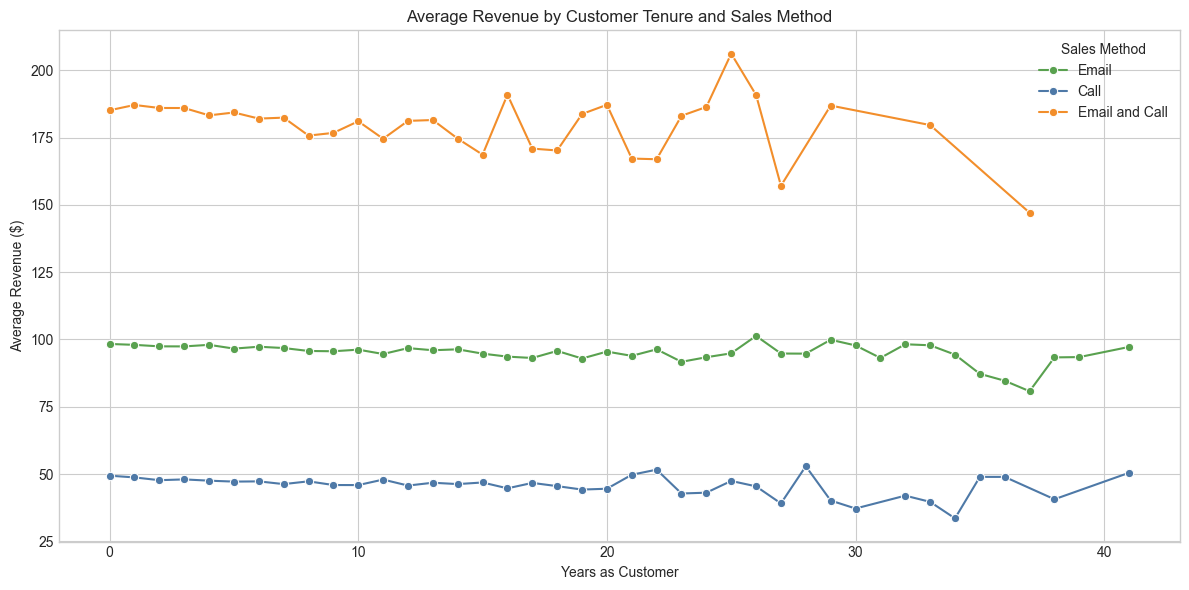

In [33]:
avg_revenue_by_year = (
    data.groupby('years_as_customer')['revenue']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_revenue_by_year, x='years_as_customer', y='revenue', marker='o')
plt.title("Average Revenue by Customer Tenure")
plt.xlabel("Years as Customer")
plt.ylabel("Average Revenue ($)")
plt.tight_layout()
plt.show()

avg_rev_by_method_tenure = (
    data.groupby(['years_as_customer', 'sales_method'])['revenue']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_rev_by_method_tenure,
    x='years_as_customer',
    y='revenue',
    hue='sales_method',
    hue_order=hue_order,
    palette=palette,
    marker='o'
)
plt.title("Average Revenue by Customer Tenure and Sales Method")
plt.xlabel("Years as Customer")
plt.ylabel("Average Revenue ($)")
plt.legend(title="Sales Method")
plt.tight_layout()
plt.show()

- Long-term customers by `state`

This comparison shows how long-term customers (10–30 years) are distributed across states compared to the overall customer base.  
We can see that the top states remain largely the same — **California**, **Texas**, **New York**, and **Florida** dominate in both cases. However, the number of long-term customers is proportionally smaller, which reflects a natural reduction over time rather than a specific regional effect.  

In other words, the geographical pattern of loyalty follows the general distribution of customers: states with the largest client bases are also those that retain the most over time. There is no significant shift in ranking, suggesting that customer longevity is relatively homogeneous across regions.


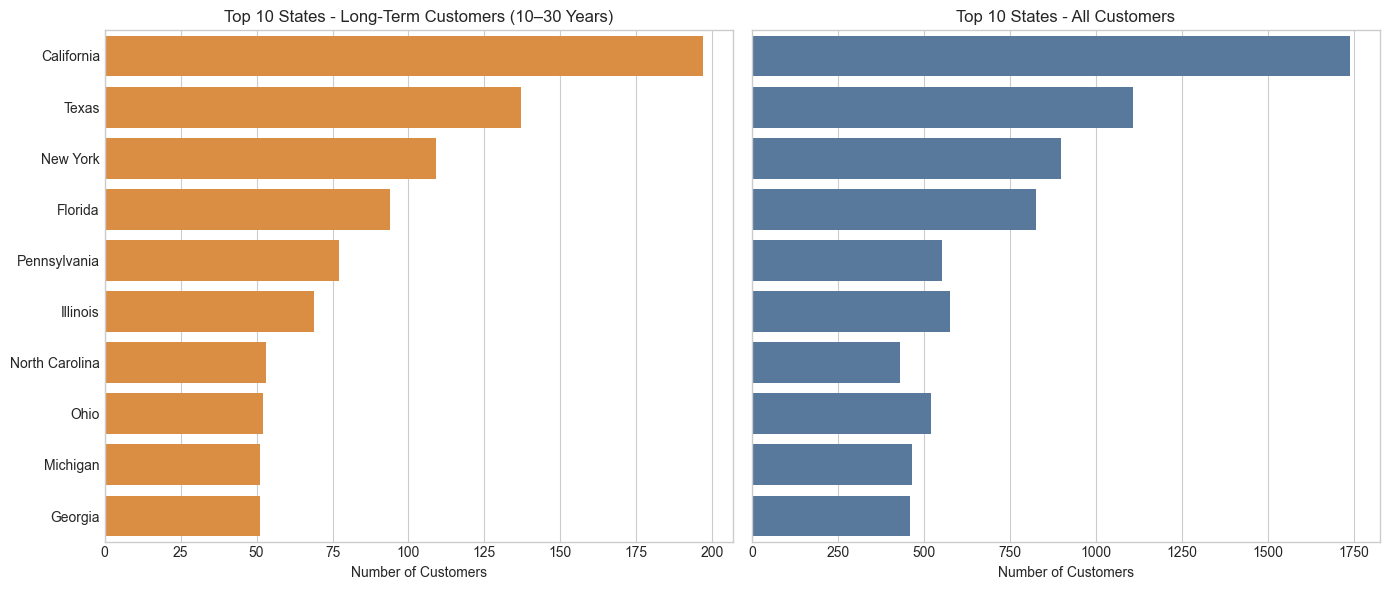

In [34]:
# Filter long-term customers
old_customers = data[(data['years_as_customer'] > 10) & (data['years_as_customer'] < 30)]

# Top 10 states - long-term customers
top_states_old = (
    old_customers['state']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'state', 'count': 'count_old'})
)

# Top 10 states - all customers
top_states_all = (
    data['state']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'state', 'count': 'count_all'})
)

# Merge both to compare
compare_states = pd.merge(top_states_all, top_states_old, on='state', how='outer').fillna(0)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(data=top_states_old, y='state', x='count_old', color="#F28E2B", ax=axes[0])
axes[0].set_title("Top 10 States - Long-Term Customers (10–30 Years)")
axes[0].set_xlabel("Number of Customers")
axes[0].set_ylabel("")

sns.barplot(data=top_states_all, y='state', x='count_all', color="#4E79A7", ax=axes[1])
axes[1].set_title("Top 10 States - All Customers")
axes[1].set_xlabel("Number of Customers")
axes[1].set_ylabel("State")

plt.tight_layout()
plt.show()

# **III – Definition of a Business Metric**

To monitor performance over time, the business needs a metric that reflects both the financial return and the operational effort required by each sales method.  
Based on the analyses, two complementary indicators emerge as relevant for evaluating campaign efficiency.


### **1. Revenue per Hour** — Efficiency Metric

This metric measures how much revenue each sales method generates per hour of estimated effort.  
It combines both performance and cost-of-execution, offering a practical way to compare methods that require different levels of human involvement.

**Formula:**
$$
\text{Revenue per Hour} = \frac{\text{Total Revenue}}{\text{Total Time (hours)}}
$$


Using the current dataset and time assumptions (`Email`: 1 min, `Call`: 30 min, `Email and Call`: 10 min per client), we obtain:

In [35]:
# Assumptions
time_per_client = {
    'Email': 1,            # 1 minute per client (estimated)
    'Call': 30,            # 30 minutes per client
    'Email and Call': 10   # 10 minutes per client 
}

# Aggregate data by sales method
summary = (
    data.groupby('sales_method')['revenue']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'Total Revenue', 'count': 'Clients'})
)

# Add time spent per client
summary['Time per Client (min)'] = summary.index.map(time_per_client)

# Calculate total time (in hours) and efficiency metrics
summary['Total Hours'] = (summary['Clients'] * summary['Time per Client (min)']) / 60
summary['Revenue per Hour'] = summary['Total Revenue'] / summary['Total Hours']
summary = summary.round(2)
summary


,Total Revenue,Clients,Time per Client (min),Total Hours,Revenue per Hour
sales_method,,,,,
Call,227563.49,4781,30,2390.50,95.19
Email,672317.83,6922,1,115.37,5827.66
Email and Call,408256.69,2223,10,370.50,1101.91


### **2. Average Revenue per Client** — Value Metric

This second metric focuses on the **average value generated per customer**.  
It reflects the **quality of engagement and sales effectiveness** of each method, regardless of the time spent.

**Formula:**
\[\text{Average Revenue per Client} = \frac{\text{Total Revenue}}{\text{Number of Customers}}\]

| Sales Method | Avg Revenue per Client |
|---------------|----------------------------|
| Email | ... |
| Call | ... |
| Email and Call | ... |

This measure complements the first one by highlighting which approach creates the most value per customer.  
As seen earlier, `Email and Call` clearly leads on this dimension, making it the best option when the objective is to **maximize revenue quality or customer value** rather than volume.


### **Summary**

Together, these two metrics provide a balanced framework to monitor campaign performance:
- `Revenue per Hour (€)` → to track **operational efficiency**
- `Average Revenue per Client (€)` → to track **customer value creation**

They give management a clear view of the trade-off between **productivity** and **impact**, helping adjust future strategies depending on business priorities.
